# <center> Embedding with Keras </center>

## I) INTRODUCTION

<br> 

This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks.

<br> 
   The Embedding vectorization layer is defined as the first hidden layer of the network. If we are studying on NLP, each word is represented by a unique integer. The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. In an embedding model, the embeddings are the weights that are learned during training. 


 <b> It is a flexible layer that can be used in a variety of ways, such as: </b>

**It can be used alone to learn a word embedding that can be saved and used in another model later.

**It can be used as part of a deep learning model where the embedding is learned along with the model itself.

**It can be used to load a pre-trained word embedding model, a type of transfer learning.

<br> 

   Embedding layer enables us to convert each word into a <b>fixed length vector </b> of defined size. The resultant vector is a dense one with having real values instead of just 0’s and 1’s.



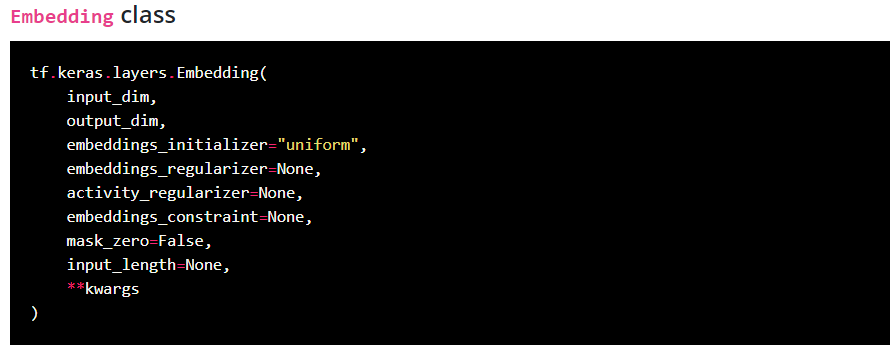

<b>Arguments:</b>

<b>input_dim:</b> Integer. Size of the vocabulary, i.e. maximum integer index + 1. For example, if integer data is encoded with values ​​from 0 to 10, then the size of the dictionary will be 11 words.

<b>output_dim:</b> Integer. Dimension of the dense embedding.

<b>embeddings_initializer:</b> Initializer for the embeddings matrix (see keras.initializers).

<b> embeddings_regularizer:</b> Regularizer function applied to the embeddings matrix (see keras.regularizers).

<b>embeddings_constraint:</b> Constraint function applied to the embeddings matrix (see keras.constraints).

<b>mask_zero:</b> Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is True, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary (input_dim should equal size of vocabulary + 1).

<b>input_length:</b> Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed). For example, if all input documents consist of 1000 words, it will be 1000.


#### Example

For example, below we define an Embedding layer with a dictionary of 200 words (for example, integer coded words from 0 to 199 ), a vector space of 32 dimensions into which words will be vectorized, and input documents, each of which contains 50 words.

<code> e = Embedding (200, 32, input_length = 50) </code>


The output of the Embedding layer is a 2D vector with one vector for each word in the input word sequence (input document). If you need to connect a fully connected layer directly to the Embedding layer, then you must first smooth the 2D output matrix onto the 1D vector using the Flatten layer.




## 2) EXAMPLES

### 2-1) NLP Example

 We have 10 text documents. Each text document is classified as a positive “1” or negative “0”.
 
 First we define the documents and their class labels.
 <code> lbls = array([1,1,1,1,1,0,0,0,0,0]) </code>

In [28]:
from numpy import array

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding


# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
lbls = array([1,1,1,1,1,0,0,0,0,0])

We estimate the size of the dictionary to be 50. Keras provides the one_hot () function, which creates a hash of each word as effective integer coding

In [24]:
vs = 50
enc_docs = [one_hot(d, vs) for d in docs]
print(enc_docs)

[[49, 43], [8, 14], [12, 36], [43, 14], [24], [30], [18, 36], [7, 8], [18, 14], [6, 28, 43, 27]]


The sequences have different lengths, and therefore we will fill all input sequences up to length 4. We can do this with the built-in function Keras <b> pad_sequences() </b>.

In [25]:
max_length = 4
p_docs = pad_sequences(enc_docs, maxlen=max_length, padding='post')
print(p_docs)

[[49 43  0  0]
 [ 8 14  0  0]
 [12 36  0  0]
 [43 14  0  0]
 [24  0  0  0]
 [30  0  0  0]
 [18 36  0  0]
 [ 7  8  0  0]
 [18 14  0  0]
 [ 6 28 43 27]]


we are ready to define our Embedding layer as part of our neural network model. The model is a simple binary classification model. It is important to note that the output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word.

In [26]:

modelEmb = Sequential()
modelEmb.add(Embedding(vs, 8, input_length=max_length))
modelEmb.add(Flatten())
modelEmb.add(Dense(1, activation='sigmoid'))
# compile the model
modelEmb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(modelEmb.summary())
# fit the model
modelEmb.fit(p_docs, lbls, epochs=150, verbose=0)
# evaluate the model
loss, accuracy = modelEmb.evaluate(p_docs, lbls, verbose=2)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
1/1 - 0s - loss: 0.4312 - acc: 0.9000
Accuracy: 89.999998


### 2-2) NLP Example

Let`s create a simple Keras model by just adding an embedding layer.

We are setting <b>10</b> as the vocabulary size, as we will be encoding numbers 0 to 9. We want the length of the word vector to be <b>4</b>, hence output_dim is set to 4. The length of the input sequence to embedding layer will be <b>2</b>.

In [27]:
model = Sequential()
embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=2)
model.add(embedding_layer)
model.compile('adam','mse')

In [28]:
import numpy as np

input_data = np.array([[1,2]])
pred = model.predict(input_data)
print(input_data.shape)
print(pred)

(1, 2)
[[[ 0.01938799 -0.02049178  0.02071167  0.02737006]
  [ 0.00375793 -0.01041154 -0.03350166  0.00646871]]]


As you can see, each word (1 and 2) is represented by a vector of length 4.
The first word (0) is represented by first row in this table, which is

<code> [0.04496637 -0.04977106  0.01584477  0.00308769]</code>


In this example we have not trained the embedding layer. <b> The weights assigned to the word vectors are initialized randomly. </b>
    
While working with actual text data, we need to train the embedding layer to get the correct word embeddings.

<b>Steps: </b>
    
1- Tokenize the sentences into words.

2- Create one-hot encoded vector for each word.

3- Use padding to ensure all sequences are of same length.

4- Pass the padded sequences as input to embedding layer.

5- Flatten and apply Dense layer to predict the label.


In [29]:
# Define 10 restaurant reviews
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]
#Define labels
labels = array([1,1,1,1,1,0,0,0,0,0])

In [30]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[28, 22, 27], [46, 20], [4, 4], [41, 15], [46, 15], [12], [12, 24], [44], [18, 14], [14, 28, 43, 27]]


Step 2: 

Here you can see the length of each encoded review is equal to the number of words in that review. 

For example:
'Never coming back!' = <code>[18, 48, 36] </code>
'awesome' = <code>[10] </code>

Step 3:

Now we need to apply padding so that all the encoded reviews are of same length. 

In [31]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

[[28 22 27  0]
 [46 20  0  0]
 [ 4  4  0  0]
 [41 15  0  0]
 [46 15  0  0]
 [12  0  0  0]
 [12 24  0  0]
 [44  0  0  0]
 [18 14  0  0]
 [14 28 43 27]]


Step 4:
    
After creating padded one-hot representation of the reviews, we are ready to pass it as input to the embedding layer.

In [32]:
model = Sequential()
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length) #input_dim = 50, output_dim=8, input_length=4
model.add(embedding_layer)

Step 5:

we create a simple Keras model. We will fix the length of embedded vectors for each word as 8 and the input length will be the maximum length which we have already defined as 4.

In [33]:
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


Next, we will train the model for 100 epochs.

In [34]:
model.fit(padded_reviews,labels,epochs=100,verbose=0)

Once the training is completed, embedding layer has learnt the weights which are nothing but the vector representations of each word. 

Lets check the shape of the weight matrix.

In [35]:
#if you wanna see embedding_layer you can run code block below.
#print(embedding_layer.get_weights()[0])


First Row

In [36]:
print(embedding_layer.get_weights()[0][0])

[ 0.11073441 -0.13886769  0.0950129   0.07775908  0.06241582 -0.13153367
 -0.06834658  0.11153403]


### 2-3) Recommender System Example (Movie Recommendation)

We look into the similarity between pairs of an item and recommend to the users.

In this example, we will apply a Deep Neural Network on a movie dataset to recommend movies to users. The system will learn movie embeddings along with the model training process. <b> We will use these embeddings to create the nearest neighbor database.</b>
    
Whenever a user clicks on a movie, the system will extract its embedding and find the nearest neighbor movies to recommend to the user.

The overall architecture of this system is shown below

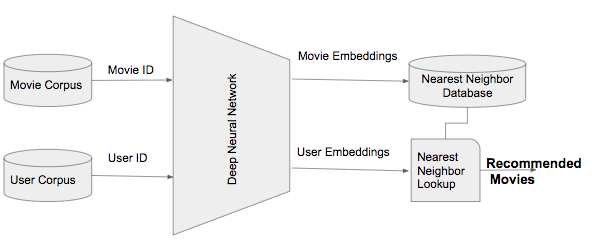

We use this embedding to lookup in the KNN database and recommend top — K movies to this user.

In [1]:
from urllib.request import urlretrieve
import zipfile
import pandas as pd

from sklearn.model_selection import train_test_split, KFold

In [2]:
# Download MovieLens data.
print("Downloading movielens data...")
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print("Done. Dataset contains:")
print(zip_ref.read('ml-100k/u.info'))

# Load each data set (users, movies, and ratings).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# The movies file contains a binary feature for each genre.
genre_cols = ["genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
     "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western" ]

movies_cols = ['movie_id', 'title', 'release_date', "video_release_date", "imdb_url"] + genre_cols

movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Since the ids start at 1, we shift them to start at 0.

users["user_id"] = users["user_id"].apply(lambda x: int(x-1)) 
# Original dataset user_id is starting with 1 but applying this fuction block user_id is starting with 0.

movies["movie_id"] = movies["movie_id"].apply(lambda x: int(x-1))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: int(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: int(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

Done. Dataset contains:
b'943 users\n1682 items\n100000 ratings\n'


In [4]:
users

,user_id,age,sex,occupation,zip_code
0,0,24,M,technician,85711
1,1,53,F,other,94043
2,2,23,M,writer,32067
3,3,24,M,technician,43537
4,4,33,F,other,15213
...,...,...,...,...,...
938,938,26,F,student,33319
939,939,32,M,administrator,02215
940,940,20,M,student,97229
941,941,48,F,librarian,78209


In [5]:
movies

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,2,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,3,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,4,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1677,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1678,1678,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1679,1679,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1680,1680,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994


In [6]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,195,241,3.0,881250949
1,185,301,3.0,891717742
2,21,376,1.0,878887116
3,243,50,2.0,880606923
4,165,345,1.0,886397596
...,...,...,...,...
99995,879,475,3.0,880175444
99996,715,203,5.0,879795543
99997,275,1089,1.0,874795795
99998,12,224,2.0,882399156


The dataset has 943 unique users and 1682 unique movies

In [7]:
movielens = ratings.merge(movies, on='movie_id').merge(users, on='user_id')

In [8]:
movielens.head()

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Romance,Sci-Fi,Thriller,War,Western,year,age,sex,occupation,zip_code
0,195,241,3.0,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,1997,49,M,writer,55105
1,195,256,2.0,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,1,0,0,0,1997,49,M,writer,55105
2,195,110,4.0,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,1,0,0,0,0,1996,49,M,writer,55105
3,195,24,4.0,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,1996,49,M,writer,55105
4,195,381,4.0,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,1994,49,M,writer,55105


In [9]:
 movielens.iloc[1]

user_id                                                             195
movie_id                                                            256
rating                                                                2
unix_timestamp                                                881251577
title                                               Men in Black (1997)
release_date                                                04-Jul-1997
video_release_date                                                  NaN
imdb_url              http://us.imdb.com/M/title-exact?Men+in+Black+...
genre_unknown                                                         0
Action                                                                1
Adventure                                                             1
Animation                                                             0
Children                                                              0
Comedy                                                          

In [10]:
print(movielens.shape)

(100000, 32)


In [11]:
movielens.columns

Index(['user_id', 'movie_id', 'rating', 'unix_timestamp', 'title',
       'release_date', 'video_release_date', 'imdb_url', 'genre_unknown',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'year',
       'age', 'sex', 'occupation', 'zip_code'],
      dtype='object')

In [12]:
min_rating = min(movielens["rating"])
max_rating = max(movielens["rating"])

In [13]:
train, test = train_test_split(movielens, test_size=0.1)

In [14]:
ROW_COUNT = train.shape[0]

In [15]:
train.shape

(90000, 32)

In [16]:
test.shape

(10000, 32)

In [17]:
ROW_COUNT = train.shape[0]

In [18]:
EMBEDDING_SIZE = 10
NUM_USERS = movielens['user_id'].nunique()
NUM_MOVIES = movielens['movie_id'].nunique()

The dataset has 943 unique user and 1682 movie.

In [19]:
NUM_USERS

943

In [20]:
NUM_MOVIES

1682

In [21]:
train.head()

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Romance,Sci-Fi,Thriller,War,Western,year,age,sex,occupation,zip_code
7570,739,301,5.0,879523187,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,0,1,0,0,1997,25,F,educator,22206
32477,750,20,5.0,889298093,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,...,0,0,1,0,0,1996,24,F,other,90034
87333,564,169,5.0,891037291,Cinema Paradiso (1988),01-Jan-1988,NaN,http://us.imdb.com/M/title-exact?Nuovo%20cinem...,0,0,...,1,0,0,0,0,1988,40,M,student,55422
62289,507,199,4.0,883768842,"Shining, The (1980)",01-Jan-1980,NaN,"http://us.imdb.com/M/title-exact?Shining,%20Th...",0,0,...,0,0,0,0,0,1980,27,M,marketing,19382
31570,888,203,4.0,880179757,Back to the Future (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,1,0,0,0,1985,24,M,technician,78704


In [22]:
UNIQUE_MOVIE_IDS = movielens['movie_id'].unique()

In [23]:
UNIQUE_MOVIE_IDS

array([ 241,  256,  110, ..., 1504, 1532, 1617], dtype=int64)

In [24]:
from tensorflow.keras import layers

In [25]:
EMBEDDING_SIZE=10

In [26]:
def EmbeddingRec(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT):
    movie_input = keras.Input(shape=(1,), name='movie_id')

    movie_emb = layers.Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_MOVIES, input_length=ROW_COUNT, name='movie_emb')(movie_input)
    movie_vec = layers.Flatten(name='FlattenMovie')(movie_emb)

    movie_model = keras.Model(inputs=movie_input, outputs=movie_vec)
    
    user_input = keras.Input(shape=(1,), name='user_id')

    user_emb = layers.Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_USERS, input_length=ROW_COUNT, name='user_emb')(user_input)
    user_vec = layers.Flatten(name='FlattenUser')(user_emb)

    user_model = keras.Model(inputs=user_input, outputs=user_vec)
    
    merged = layers.Dot(name = 'dot_product', normalize = True, axes = 2)([movie_emb, user_emb])
    merged_dropout = layers.Dropout(0.2)(merged)
    
    
    dense_1 = layers.Dense(70,name='FullyConnected-1')(merged)
    dropout_1 = layers.Dropout(0.2,name='Dropout_1')(dense_1)

    dense_2 = layers.Dense(50,name='FullyConnected-2')(dropout_1)
    dropout_2 = layers.Dropout(0.2,name='Dropout_2')(dense_2)

    dense_3 = keras.layers.Dense(20,name='FullyConnected-3')(dropout_2)
    dropout_3 = keras.layers.Dropout(0.2,name='Dropout_3')(dense_3)

    dense_4 = keras.layers.Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)

    result = layers.Dense(1, name='result', activation="relu") (dense_4)

    adam = keras.optimizers.Adam(lr=0.001)
    model = keras.Model([movie_input, user_input], result)
    model.compile(optimizer=adam,loss= 'mean_absolute_error')
    return model, movie_model, user_model

In [29]:
model, movie_model, user_model = EmbeddingRec(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT)

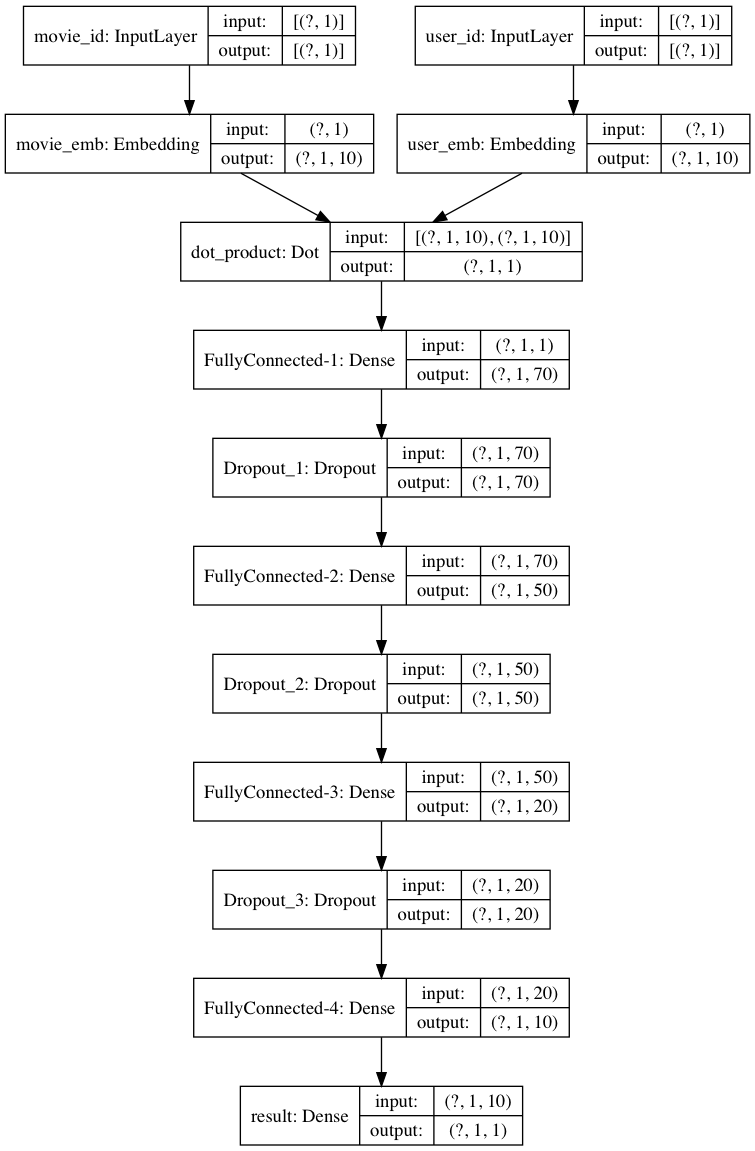

In [30]:
callbacks = [keras.callbacks.EarlyStopping('val_loss', patience=10),
             keras.callbacks.ModelCheckpoint('besttest.h5', save_best_only=True)]

history = model.fit([train.movie_id, train.user_id],train.rating, batch_size=100,
                              epochs =50, validation_data = ([test.movie_id, test.user_id],test.rating),
                              verbose = 1, 
                              callbacks = callbacks)

Epoch 1/50
900/900 [==============================] - 1s 1ms/step - loss: 1.0656 - val_loss: 0.9409
Epoch 2/50
900/900 [==============================] - 1s 1ms/step - loss: 0.9487 - val_loss: 0.9422
Epoch 3/50
900/900 [==============================] - 1s 1ms/step - loss: 0.9288 - val_loss: 0.9280
Epoch 4/50
900/900 [==============================] - 1s 1ms/step - loss: 0.8946 - val_loss: 0.8285
Epoch 5/50
900/900 [==============================] - 1s 1ms/step - loss: 0.7635 - val_loss: 0.7766
Epoch 6/50
900/900 [==============================] - 1s 1ms/step - loss: 0.7011 - val_loss: 0.7644
Epoch 7/50
900/900 [==============================] - 1s 1ms/step - loss: 0.6716 - val_loss: 0.7613
Epoch 8/50
900/900 [==============================] - 1s 1ms/step - loss: 0.6523 - val_loss: 0.7608
Epoch 9/50
900/900 [==============================] - 1s 1ms/step - loss: 0.6402 - val_loss: 0.7611
Epoch 10/50
900/900 [==============================] - 1s 1ms/step - loss: 0.6296 - val_loss: 0.7554

In [32]:
import numpy as np
user_model.predict([np.array([10]), np.array([3])]).reshape(-1,1)

array([[ 0.20162359],
       [-0.18612587],
       [-0.29860932],
       [ 0.06310415],
       [-0.0160315 ],
       [-0.03960453],
       [-0.03590751],
       [ 0.0270769 ],
       [ 0.04222713],
       [-0.17076614]], dtype=float32)

In [33]:
user_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
user_id (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
user_emb (Embedding)         (None, 1, 10)             9430      
_________________________________________________________________
FlattenUser (Flatten)        (None, 10)                0         
Total params: 9,430
Trainable params: 9,430
Non-trainable params: 0
_________________________________________________________________


In [34]:
movie_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
movie_id (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
movie_emb (Embedding)        (None, 1, 10)             16820     
_________________________________________________________________
FlattenMovie (Flatten)       (None, 10)                0         
Total params: 16,820
Trainable params: 16,820
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_id (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_emb (Embedding)           (None, 1, 10)        16820       movie_id[0][0]                   
__________________________________________________________________________________________________
user_emb (Embedding)            (None, 1, 10)        9430        user_id[0][0]                    
_______________________________________________________________________________________

In [36]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , 'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'], loc='upper right')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 1 Axes>

### Nearest Neighbor Recommendation

In [37]:
TEST_USER_ID = 200
TEST_MOVIE_ID = 123

### Extract Movie embedding

In [38]:
import collections

MOVIE_EMBEDDING_LIST = []
MOVIE_EMBED_MAP = collections.defaultdict()

In [39]:
for _id in UNIQUE_MOVIE_IDS:
    emb = movie_model.predict(np.array([_id]))
    val = list(emb.reshape(1,-1))[0]
    MOVIE_EMBEDDING_LIST.insert(_id, val)
    MOVIE_EMBED_MAP[_id] = val

In [40]:
#check MOVIE_EMBED_MAP
#print(MOVIE_EMBED_MAP)


### Verify Embeddings
How do we know that these embeddings are correct? One way to verify them is to plot those embeddings. Once you plot, you will see that movies with a similar rating (as the rating was our target) are close by in the embedding space. Let's have a look.


In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def tsne_plot(model, MOVIE_EMBEDDING_LIST, size = NUM_MOVIES):
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(MOVIE_EMBEDDING_LIST[:size])
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    labels = list(range(0,size))
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
    plt.show()

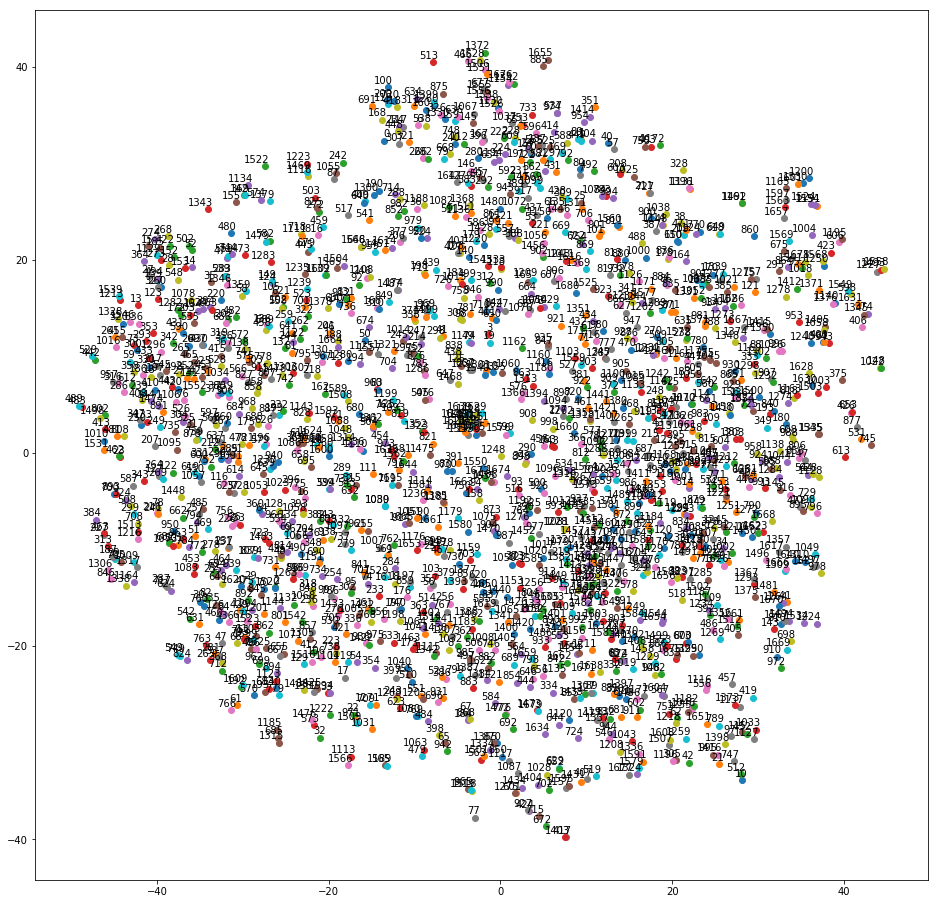

In [43]:
tsne_plot(model, MOVIE_EMBEDDING_LIST)

The above figure is a little hard to visualize. So I am going to plot the 1st 300 movie embeddings to check if I can get a clearer picture.

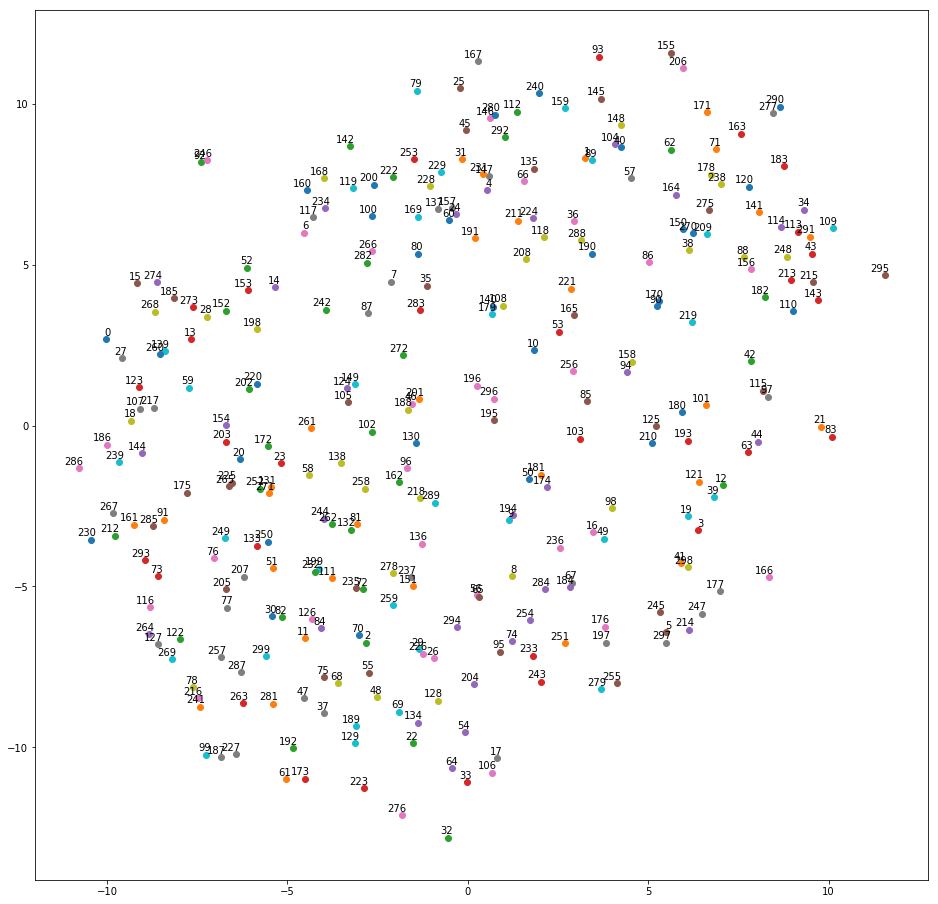

In [44]:
tsne_plot(model, MOVIE_EMBEDDING_LIST, 300)

We will check films which id numbers are 161,212 and 267 respectively, they are taking part close on illustration. We are expecting those are similar to each other.

In [45]:
print(movielens.loc[(movielens['movie_id']==161) ,["user_id","title","rating","Drama"]])
print("\n\nAverage Rating: ", np.average(movielens.loc[movielens['movie_id'] == 161, 'rating'], axis=0))

       user_id                  title  rating  Drama
1297       353  On Golden Pond (1981)     3.0      1
1667         0  On Golden Pond (1981)     4.0      1
2166       233  On Golden Pond (1981)     3.0      1
3792       416  On Golden Pond (1981)     3.0      1
6595       638  On Golden Pond (1981)     3.0      1
...        ...                    ...     ...    ...
93994      762  On Golden Pond (1981)     4.0      1
95633      718  On Golden Pond (1981)     4.0      1
95972      537  On Golden Pond (1981)     3.0      1
96020      572  On Golden Pond (1981)     4.0      1
97793      849  On Golden Pond (1981)     3.0      1

[106 rows x 4 columns]


Average Rating:  3.556603773584906


In [46]:
print(movielens.loc[(movielens['movie_id']==212) ,["user_id","title","rating","Drama"]])
print("\n\nAverage Rating: ", np.average(movielens.loc[movielens['movie_id'] == 212, 'rating'], axis=0))

       user_id                       title  rating  Drama
963        200  Room with a View, A (1986)     4.0      1
1301       353  Room with a View, A (1986)     5.0      1
1677         0  Room with a View, A (1986)     2.0      1
2179       233  Room with a View, A (1986)     3.0      1
2452        13  Room with a View, A (1986)     5.0      1
...        ...                         ...     ...    ...
95879      730  Room with a View, A (1986)     5.0      1
95973      537  Room with a View, A (1986)     3.0      1
97888      168  Room with a View, A (1986)     5.0      1
98537      527  Room with a View, A (1986)     4.0      1
99900      357  Room with a View, A (1986)     5.0      1

[134 rows x 4 columns]


Average Rating:  3.985074626865672


In [47]:
print(movielens.loc[(movielens['movie_id']==267) ,["user_id","title","rating","Drama"]])
print("\n\nAverage Rating: ", np.average(movielens.loc[movielens['movie_id'] == 267, 'rating'], axis=0))

       user_id               title  rating  Drama
63          62  Chasing Amy (1997)     3.0      1
302        295  Chasing Amy (1997)     4.0      1
779        200  Chasing Amy (1997)     4.0      1
1198       353  Chasing Amy (1997)     4.0      1
1395       198  Chasing Amy (1997)     5.0      1
...        ...                 ...     ...    ...
99459      265  Chasing Amy (1997)     4.0      1
99549      316  Chasing Amy (1997)     3.0      1
99739       35  Chasing Amy (1997)     2.0      1
99761      686  Chasing Amy (1997)     5.0      1
99889      357  Chasing Amy (1997)     3.0      1

[255 rows x 4 columns]


Average Rating:  3.792156862745098


## Top-K Candidates using K-Nearest Neighbor

Now that we have the embeddings, we can apply the nearest neighbor algorithm to recommend movies to users. We can get `user_embedding` from the `user_id` and find out what are the movies that are close to the `user_embedding` in the embedding space. We use K-Nearest Neighbor algorithm for this purpose.

In [48]:
knn_train_label = UNIQUE_MOVIE_IDS

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(MOVIE_EMBEDDING_LIST, knn_train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [50]:
def recommend_movies(embedding):
    distances, indices = clf.kneighbors(embedding.reshape(1, -1),  n_neighbors=10)
    indices = indices.reshape(10,1)
    df_indices = pd.DataFrame(indices, columns = ['movie_id'])
    return df_indices.merge(movies,on='movie_id',how='inner',suffixes=['_u', '_m'])['title']

In [51]:
TEST_USER_ID

200

In [52]:
user_embedding = user_model.predict([TEST_USER_ID]).reshape(1,-1)[0]

In [53]:
recommend_movies(user_embedding)

0                      Dante's Peak (1997)
1                      Desert Winds (1995)
2                      First Knight (1995)
3                      Mediterraneo (1991)
4                   Quiet Room, The (1996)
5    Visitors, The (Visiteurs, Les) (1993)
6                        Nightwatch (1997)
7                             Steel (1997)
8                            Angela (1995)
9                           Nowhere (1997)
Name: title, dtype: object

### 2-4) Recommender System Example (Book Recommendation)

We will use the goodbooks-10k (https://www.kaggle.com/zygmunt/goodbooks-10k) dataset which contains 10K different books and about 1M ratings. It has three features the book_id, user_id and rating.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import load_model

Splitting the data into a training and testing set

In [3]:
dataset = pd.read_csv('dataset/databookrecommendationdataset/ratings.csv')
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
n_users

53424

In [5]:
n_books

10000

In [6]:
dataset.shape

(981756, 3)

The structure of the model would be: <br>
<b>Input:</b> Book and Users<br>
<b>Embedding Layers:</b> Books and Users<br>
<b>Dot:</b> Combines Embedding using a Dot Product

In [7]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Book-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 5)         50005       Book-Input[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      User-Input[0][0]                 
_______________________________________________________________________________________

Epoch 1/10
24544/24544 [==============================] - 81s 3ms/step - loss: 13.7186
Epoch 2/10
24544/24544 [==============================] - 82s 3ms/step - loss: 4.6747
Epoch 3/10
24544/24544 [==============================] - 78s 3ms/step - loss: 1.8721
Epoch 4/10
24544/24544 [==============================] - 76s 3ms/step - loss: 1.2265
Epoch 5/10
24544/24544 [==============================] - 75s 3ms/step - loss: 0.9678
Epoch 6/10
24544/24544 [==============================] - 75s 3ms/step - loss: 0.8351
Epoch 7/10
24544/24544 [==============================] - 76s 3ms/step - loss: 0.7589
Epoch 8/10
24544/24544 [==============================] - 78s 3ms/step - loss: 0.7105
Epoch 9/10
24544/24544 [==============================] - 86s 4ms/step - loss: 0.6794
Epoch 10/10
24544/24544 [==============================] - 85s 3ms/step - loss: 0.6568


Text(0, 0.5, 'Training Error')

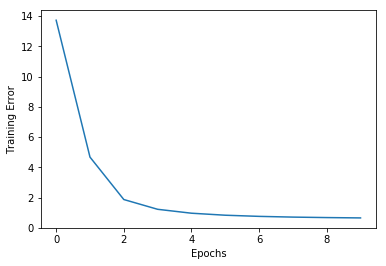

In [9]:
if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
    model.save('regression_model.h5')
    
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [11]:
test_predict = model.predict([test.user_id,test.book_id])
test['predicted_rating'] = test_predict
test.head()


C:\Users\orhun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,book_id,user_id,rating,predicted_rating
646451,6495,19643,5,4.592923
614851,6175,8563,4,3.631918
974393,9920,52110,3,3.737059
21471,215,33864,5,4.508867
272540,2728,16587,3,3.323055


### Visualizing Embeddings

<p style="color:red";>Starting with 10000 dimensions (one for each book), we map them to 5 dimensions using embedding and then further map them to 2 dimensions using PCA or TSNE. </p>


In [12]:
book_em = model.get_layer('Book-Embedding')
book_em.get_weights()

[array([[ 0.01755203,  0.01924949,  0.04318405, -0.04611173,  0.00953   ],
        [-1.0585253 ,  1.7844825 ,  1.6561239 , -0.31979868, -1.7703058 ],
        [-1.5776197 ,  1.3874017 ,  1.5487496 , -0.55234015, -1.7125366 ],
        ...,
        [-1.5912272 ,  2.0547962 ,  1.2817156 , -0.4183885 , -1.6657234 ],
        [-1.7197846 ,  1.713362  ,  1.2651353 ,  0.78855574, -1.6724491 ],
        [-1.7904931 ,  2.116991  ,  0.23535657, -0.01935422, -2.1465654 ]],
       dtype=float32)]

In [13]:
book_em_weights = book_em.get_weights()[0]

#### Reducing dimensionality using PCA

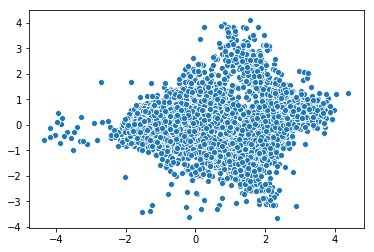

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.004s...
[t-SNE] Computed neighbors for 10001 samples in 0.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.174693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.367691
[t-SNE] KL

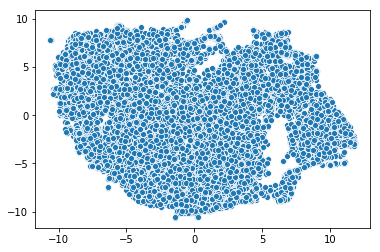

In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

### Recommendation Part

In [16]:
book_data = np.array(list(set(dataset.book_id)))
book_data

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [17]:
user = np.array([1 for i in range(len(book_data))])
user

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
print(recommended_book_ids)

[3223 8340 6246 5858 5492]


In [19]:
print(predictions[recommended_book_ids])

[5.827171  5.659397  5.651457  5.6402965 5.482304 ]


In [20]:
books = pd.read_csv('dataset/databookrecommendationdataset/books.csv')
books.head()
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3222,3223,13151,13151,3236105,76,446613355,9.780447e+12,James Patterson,2004.0,London Bridges,...,32455,34843,846,368,1689,8800,13401,10585,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5491,5492,906541,906541,2127174,26,64434516,9.780064e+12,"Russell Hoban, Garth Williams",1960.0,Bedtime for Frances,...,22865,23104,246,333,958,4598,6569,10646,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5857,5858,16297,16297,894955,171,425205959,9.780425e+12,Agatha Christie,1936.0,Cards on the Table,...,19577,23004,1031,112,857,6468,9372,6195,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6245,6246,8447255,8447255,13311158,25,593046358,9.780593e+12,Steven Erikson,2011.0,The Crippled God,...,14472,16590,720,133,392,1553,4461,10051,https://images.gr-assets.com/books/1320388198m...,https://images.gr-assets.com/books/1320388198s...
8339,8340,41958,41958,41459,78,752865366,9.780753e+12,Maeve Binchy,2004.0,Nights of Rain and Stars,...,12365,14137,1015,282,1158,4544,5117,3036,https://images.gr-assets.com/books/1355496059m...,https://images.gr-assets.com/books/1355496059s...


### References

1) https://learn-neural-networks.com/world-embedding-by-keras/

2) https://keras.io/api/layers/core_layers/embedding/

3) https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

4) https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-

5) https://towardsdatascience.com/recommender-systems-from-learned-embeddings-f1d12288f278

6) https://github.com/nahidalam

7) https://github.com/divensambhwani/Book-Recommendation--Using-Keras
